Dans ce notebook, nous allons étudier le fait qu'il y ait une différence de prix pour les jours 0, 1 et 2 entre mobile=1 et mobile=0.

=> Résultat à retrouver !
Prix plus élevé quand mobile=1

# Import librairies et données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("../data/train/train_set.csv") # issu du notebook req_api
df_vienna = pd.read_csv("../data/clean/vienna.csv")
df_vilnius = pd.read_csv("../data/clean/vilnius.csv")
df_amsterdam = pd.read_csv("../data/clean/amsterdam.csv")
df_rome = pd.read_csv("../data/clean/rome.csv")
df_valletta = pd.read_csv("../data/clean/valletta.csv")
df_paris = pd.read_csv("../data/clean/paris.csv")
df_madrid = pd.read_csv("../data/clean/madrid.csv")
df_copenhagen = pd.read_csv("../data/clean/copenhagen.csv")
df_sofia = pd.read_csv("../data/clean/sofia.csv")
df_hung = pd.concat([df_vienna, df_vilnius, df_amsterdam, df_rome, df_valletta, df_paris, df_madrid, df_copenhagen, df_sofia])

In [43]:
display(df_hung)
display(df)

,hotel_id,price,stock,city,date,language,mobile,avatar_id,avatar_name
0,890,76,0,vienna,0,hungarian,0,295268,99S11K
1,875,103,0,vienna,0,hungarian,0,295268,99S11K
2,336,123,0,vienna,0,hungarian,0,295268,99S11K
3,173,107,0,vienna,0,hungarian,0,295268,99S11K
4,315,286,0,vienna,0,hungarian,0,295268,99S11K
...,...,...,...,...,...,...,...,...,...
2413,578,85,196,sofia,44,hungarian,0,295222,P959MX
2414,883,87,192,sofia,44,hungarian,0,295222,P959MX
2415,107,40,55,sofia,44,hungarian,0,295222,P959MX
2416,899,72,138,sofia,44,hungarian,0,295222,P959MX


,hotel_id,price,stock,city,date,language,mobile,avatar_id,avatar_name,order_requests
0,768,286,13,madrid,11,portuguese,0,155051,8HOAWS,1
1,126,96,8,madrid,11,portuguese,0,155051,8HOAWS,1
2,378,124,0,madrid,11,portuguese,0,155051,8HOAWS,1
3,351,91,4,madrid,11,portuguese,0,155051,8HOAWS,1
4,747,172,15,madrid,11,portuguese,0,155051,8HOAWS,1
...,...,...,...,...,...,...,...,...,...,...
166832,503,277,4,vilnius,5,lithuanian,0,267714,9HJM3R,1566
166833,240,224,4,vilnius,5,lithuanian,0,267714,9HJM3R,1566
166834,820,207,4,vilnius,5,lithuanian,0,267714,9HJM3R,1566
166835,288,113,0,vilnius,5,lithuanian,0,267714,9HJM3R,1566


In [44]:
# Renommage colonnes df_hung et jointure avec celui du train où le language=hungarian
df_hung = df_hung.rename(columns={"price": "price_hung", "stock": "stock_hung", "mobile": "mobile_hung",
                       "avatar_id": "avatar_id_hung", "avatar_name": "avatar_name_hung"})
# display(df_hung)

df_ = df[df['language']=='hungarian']
# display(df_)

df_comp = df_.merge(df_hung, how='left', on=['hotel_id', 'date'])
display(df_comp)

,hotel_id,price,stock,city_x,date,language_x,mobile,avatar_id,avatar_name,order_requests,price_hung,stock_hung,city_y,language_y,mobile_hung,avatar_id_hung,avatar_name_hung
0,714,70,19,rome,30,hungarian,1,156582,0D28CG,89,70,19,rome,hungarian,0,295163,RUT5FY
1,112,70,22,rome,30,hungarian,1,156582,0D28CG,89,70,22,rome,hungarian,0,295163,RUT5FY
2,486,157,66,rome,30,hungarian,1,156582,0D28CG,89,157,66,rome,hungarian,0,295163,RUT5FY
3,642,66,31,rome,30,hungarian,1,156582,0D28CG,89,66,31,rome,hungarian,0,295163,RUT5FY
4,751,200,122,rome,30,hungarian,1,156582,0D28CG,89,200,122,rome,hungarian,0,295163,RUT5FY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8362,141,85,0,sofia,1,hungarian,1,267703,JYYYYE,1555,85,0,sofia,hungarian,0,295179,ZF1A8I
8363,181,100,0,sofia,1,hungarian,1,267703,JYYYYE,1555,100,0,sofia,hungarian,0,295179,ZF1A8I
8364,923,53,0,sofia,1,hungarian,1,267703,JYYYYE,1555,53,0,sofia,hungarian,0,295179,ZF1A8I
8365,862,74,0,sofia,1,hungarian,1,267703,JYYYYE,1555,74,0,sofia,hungarian,0,295179,ZF1A8I


Text(0.5, 1.0, 'Distribution du prix moyen par date selon mobile=0')

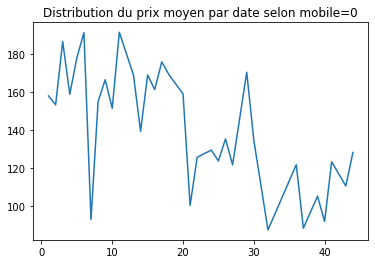

In [65]:
df_cp = df_comp[df_comp['mobile']==0] # computer
df_ph = df_comp[df_comp['mobile']==1] # phone

df_prices_hung = df_comp[['date', 'price_hung']]
# display(df_prices_hung)

df_prices_mean_hung = df_prices_hung.groupby(['date']).mean()
# display(df_prices_mean_hung)

plt.plot(df_prices_mean_hung['price_hung'])
plt.title('Distribution du prix moyen par date selon mobile=0')

Text(0.5, 1.0, 'Distribution du prix moyen par date selon mobile=1')

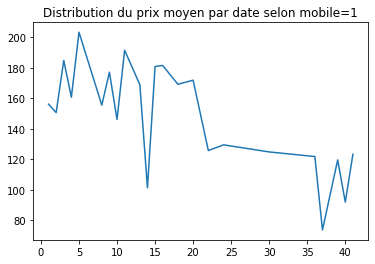

In [64]:
df_prices_ = df_ph[['date', 'price']]
# display(df_prices_)

df_prices_mean_ = df_prices_.groupby(['date']).mean()
# display(df_prices_mean_)

plt.plot(df_prices_mean_['price'])
plt.title('Distribution du prix moyen par date selon mobile=1')